In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline
from IPython.display import display
from ipywidgets import interact
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('WorldEconomicOutlookData.csv')
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: National Statistics Office Latest actu...,NaN,...,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678,2018.0
2,512,AFG,NGDPRPPPPCPCH,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,3.063,2018.0
3,512,AFG,PCPIPCH,Afghanistan,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,4.451,2018.0
4,512,AFG,PCPIEPCH,Afghanistan,"Inflation, end of period consumer prices",Annual percentages of end of period consumer ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.5,5,2018.0
5,512,AFG,LUR,Afghanistan,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,512,AFG,GGXCNL_NGDP,Afghanistan,General government net lending/borrowing,Net lending (+)/ borrowing (?) is calculated a...,Percent of GDP,NaN,Source: Ministry of Finance or Treasury Latest...,NaN,...,-0.631,-1.719,-1.378,0.118,-0.63,1.502,-0.983,-4,-2.007,2018.0
7,512,AFG,BCA_NGDPD,Afghanistan,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,Source: Various sources: Central Statistical O...,NaN,...,1.444,6.549,3.709,8.375,7.087,12.986,8.591,4.898,5.753,2018.0
8,914,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: IMF Staff Estimates Latest actual data...,2.684,...,1.002,1.774,2.219,3.315,3.802,4.071,2.214,-5.006,8,2018.0
9,914,ALB,PPPGDP,Albania,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: IMF Staff Estimates Latest actual data...,5.563,...,30.398,31.51,32.545,33.972,35.928,38.301,39.832,38.078,41.926,2018.0


In [22]:
df.dropna(subset=['ISO'], inplace=True)

In [24]:
subjects = df['Subject Descriptor'].unique()
subjects

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product per capita, constant prices',
       'Inflation, average consumer prices',
       'Inflation, end of period consumer prices', 'Unemployment rate',
       'General government net lending/borrowing',
       'Current account balance'], dtype=object)

In [26]:
new_dfs = []
for s in subjects:
    new_dfs.append(df[df['Subject Descriptor'] == s])

In [77]:
new_subjects = ['GDP_const', 'GDP_curr', 'GDPPC_const', 'inflation_avg_consumer', 'inflation_endofperiod', 'unemployment_rate', 'general_govt_net_lendborr', 'current_acct_bal']
i = 0
for ndf in new_dfs:
    ndf.to_csv(new_subjects[i] + '.csv', index=None)
    i += 1

In [30]:
new_dfs[0].head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0
8,914,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: IMF Staff Estimates Latest actual data...,2.684,...,1.002,1.774,2.219,3.315,3.802,4.071,2.214,-5.006,8,2018.0
16,612,DZA,NGDP_RPCH,Algeria,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,-5.4,...,2.8,3.8,3.7,3.2,1.3,1.4,0.7,-5.157,6.231,2019.0
24,614,AGO,NGDP_RPCH,Angola,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office. Ministry o...,2.406,...,4.955,4.823,0.944,-2.58,-0.15,-1.2,-1.503,-1.374,2.644,2018.0
32,311,ATG,NGDP_RPCH,Antigua and Barbuda,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: Central Bank Latest actual data: 2018....,8.161,...,-0.601,3.797,3.824,5.498,3.145,7.389,5.264,-9.998,7.959,2018.0


In [131]:
countries = df[['WEO Country Code', 'ISO', 'Country']]
countries.drop_duplicates(inplace=True)
countries.head()

C:\Users\thken\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,WEO Country Code,ISO,Country
0,512,AFG,Afghanistan
8,914,ALB,Albania
16,612,DZA,Algeria
24,614,AGO,Angola
32,311,ATG,Antigua and Barbuda


In [49]:
for ndf in new_dfs:
    newESA = []
    for year in ndf['Estimates Start After']:
        try:
            newESA.append(int(year - 1980))
        except:
            newESA.append(np.nan)
    ndf['ESA_index'] = newESA

C:\Users\thken\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
for ndf in new_dfs:
    arr = ndf.loc[:, '1980': '2021'].values
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            try:
                arr[i, j] = float(arr[i, j])
            except:
                arr[i, j] = np.nan
                
    ndf.loc[:, '1980': '2021'] = arr

In [164]:
subjects = df['Subject Descriptor'].unique()

In [175]:
years = list(df.columns[9:-1].astype(int))

In [203]:
for ndf in new_dfs:
    for col in years:
        col = str(col)
        new_col = []
        for val in ndf[col]:
            try:
                new_col.append(float(val.replace(',', '')))
            except:
                new_col.append(val)
        ndf[col] = new_col

C:\Users\thken\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [205]:
for col in years:
    col = str(col)
    new_col = []
    for val in df[col]:
        try:
            new_col.append(float(val.replace(',', '')))
        except:
            new_col.append(val)
    df[col] = new_col

In [318]:
for col in years:
    col = str(col)
    new_col = []
    for val in df[col]:
        if val == '--':
            new_col.append(np.nan)
        else:
            new_col.append(val)
    df[col] = new_col

In [534]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  

In [653]:
@interact
def show(Country=countries['Country'],
         Subject=subjects):
    data = df[(df['Country'] == Country) & (df['Subject Descriptor'] == Subject)]
    temp = data.loc[:, '1980':'2021']
    x = temp.dropna(axis=1).values[0]
    new_years = np.array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])
    
    plt.figure(figsize=(20,10))
    plt.plot(years, temp.values[0], label="Current")
    
    if (Subject == 'Gross domestic product, current prices'):
        temp = temp.dropna(axis=1)
        X = np.array(temp.columns.astype(int))
        X = X.reshape(len(X), 1)
        y = temp.values[0]

        poly = PolynomialFeatures(degree=2)
        X_ = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_, y)
        yhat = model.predict(poly.transform(new_years.reshape(10, 1)))
        yhat[0] = x[-1]
        plt.plot(new_years, yhat, label="Predicted")
    else:
        try:
            model = ARMA(x, order=(0, 3))
            model_fit = model.fit(disp=False)
            yhat = model_fit.predict(len(x) - 1, len(x) + 5)
            yhat[0] = x[-1]
            plt.plot([2021, 2022, 2023, 2024, 2025, 2026, 2027], yhat, label="Predicted")
        except:
            pass
    
    plt.legend(fontsize=20)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel(data['Units'].values[0], fontsize=20)
    plt.title(Country + " - " + Subject, fontsize=20)
    plt.show()

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

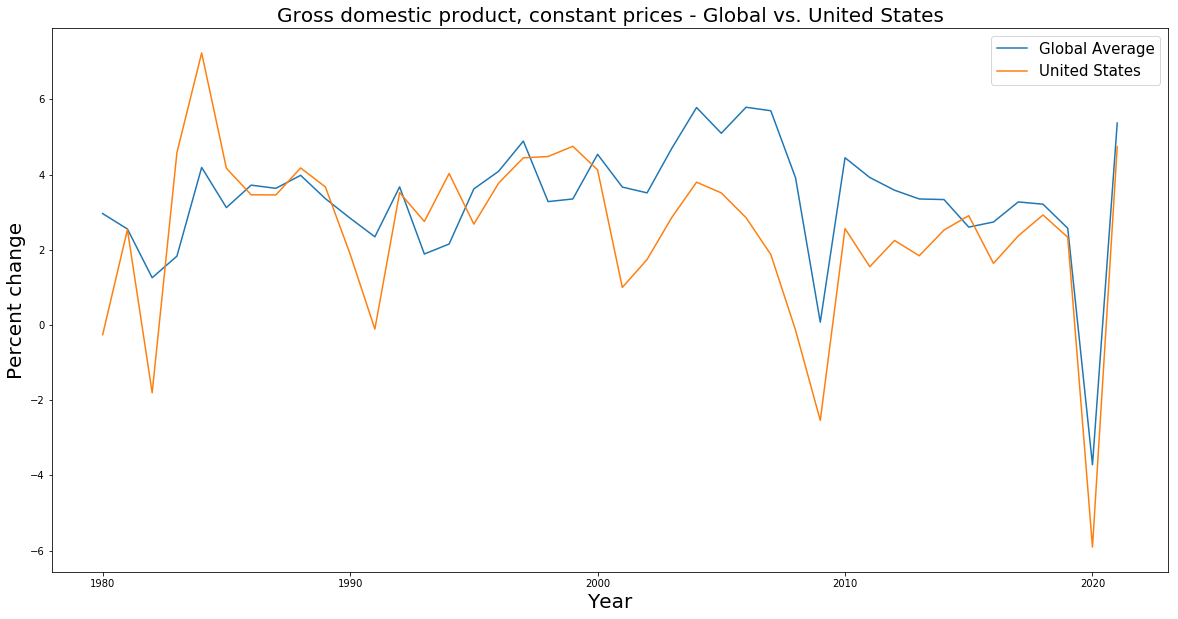

In [648]:
gdp = df[df['Subject Descriptor'] == 'Gross domestic product, constant prices']
plt.figure(figsize=(20,10))
plt.plot(years, gdp.loc[:, '1980':'2021'].mean().values, label="Global Average")
plt.plot(years, gdp[gdp['Country'] == 'United States'].loc[:, '1980':'2021'].values[0], label="United States")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Percent change", fontsize=20)
plt.title("Gross domestic product, constant prices - Global vs. United States", fontsize=20)
plt.legend(fontsize=15)
plt.show()

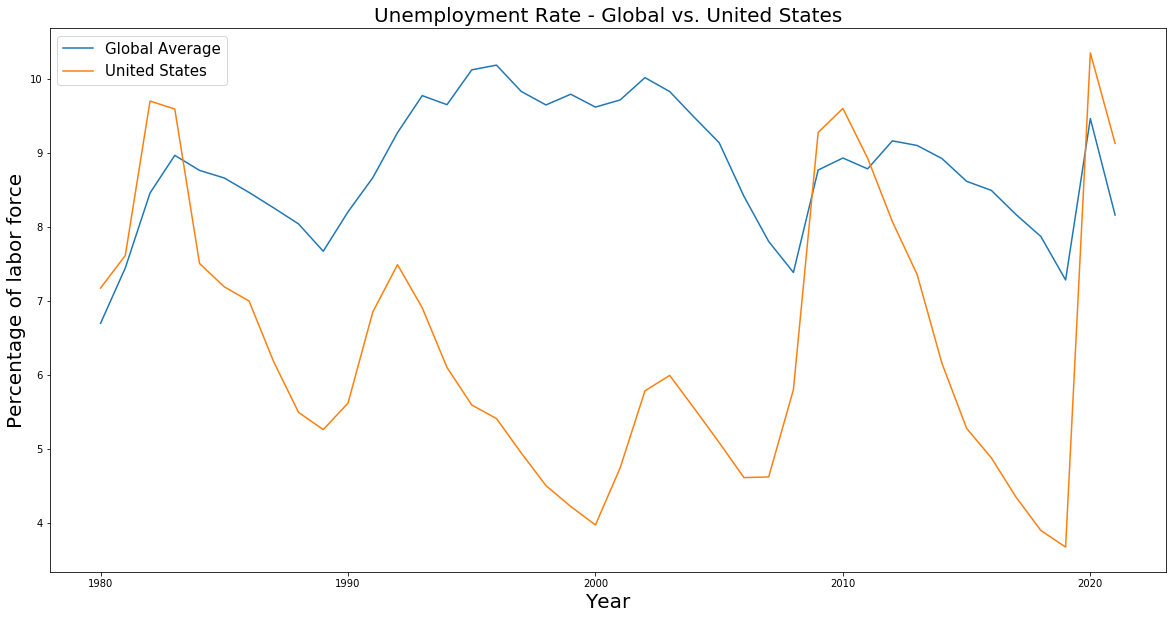

In [647]:
unemp = df[df['Subject Descriptor'] == 'Unemployment rate']
plt.figure(figsize=(20,10))
plt.plot(years, unemp.loc[:, '1980':'2021'].mean().values, label="Global Average")
plt.plot(years, unemp[unemp['Country'] == 'United States'].loc[:, '1980':'2021'].values[0], label="United States")
plt.xlabel("Year", fontsize=20)
plt.ylabel("Percentage of labor force", fontsize=20)
plt.title("Unemployment Rate - Global vs. United States", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [384]:
unemp2 = pd.concat([unemp['Country'], unemp.loc[:, '1980':'2021']], axis=1)
unemp2.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
5,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Albania,5.028,4.224,2.813,3.335,4.410,5.853,5.430,5.164,6.033,...,13.400,15.900,17.5,17.100,15.200,13.700,12.300,12.000,11.800,11.500
21,Algeria,15.789,15.385,15.000,14.286,16.536,16.901,18.356,20.056,21.801,...,10.969,9.829,10.6,11.214,10.498,11.709,11.731,11.383,15.091,13.909
29,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [499]:
unemp_data = []
for i in range(unemp2.Country.count()):
    x = unemp2.iloc[i, 1:].values
    temp = pd.DataFrame(np.hstack((years.reshape(len(years), 1), x.reshape(len(x), 1))), columns=['year', 'rate'])
    temp = temp.dropna().sort_values(by=['rate'], ascending=False)[:5].to_numpy()
    for t in temp:
        unemp_data.append(t)
        
unemp_data = np.array(unemp_data).T

In [500]:
counts = np.unique(unemp_data[0], return_counts=True)

In [611]:
temp = pd.DataFrame()
temp['year'] = counts[0]
temp['count'] = counts[1]

max_years = []
for i in range(0, 41, 10):
    max_years.append(temp[i:i+10].sort_values(by=['count'], ascending=False).values[0])

In [615]:
max_years = np.array(max_years)
max_years = max_years.T

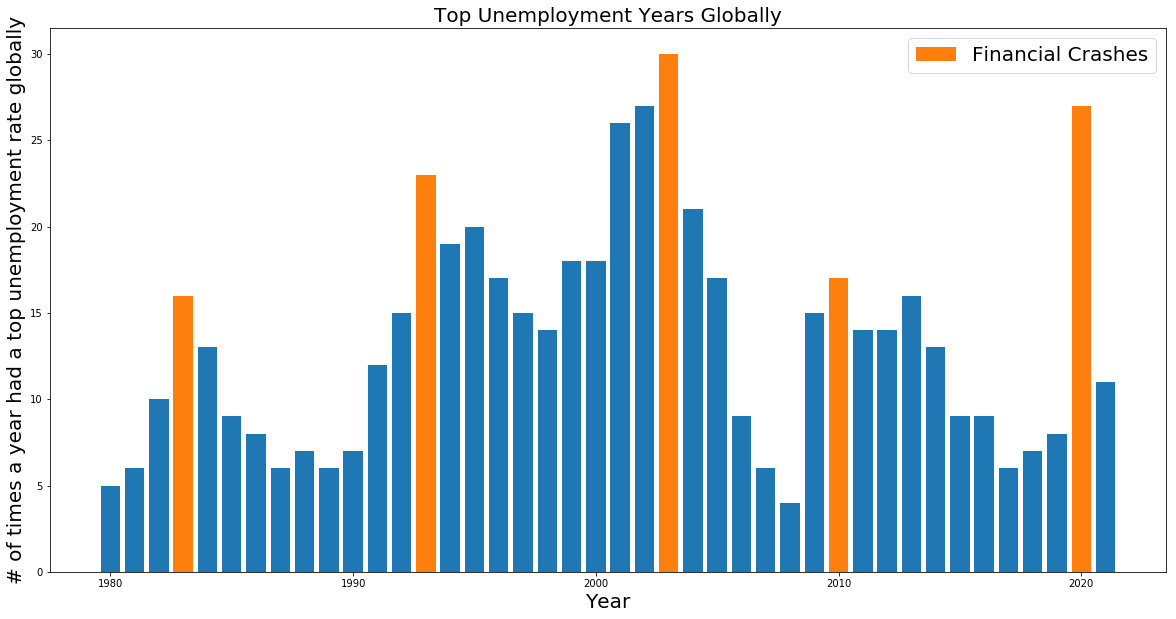

In [637]:
plt.figure(figsize=(20,10))
plt.bar(counts[0], counts[1])
plt.bar(max_years[0], max_years[1], label='Financial Crashes')
plt.xlabel('Year', fontsize=20)
plt.ylabel('# of times a year had a top unemployment rate globally', fontsize=20)
plt.title('Top Unemployment Years Globally', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [557]:
df.to_csv('new_data.csv', index=None)

In [570]:
gdp = df[df['Subject Descriptor'] == 'Gross domestic product, current prices']

In [583]:
to_concat = []

for country in gdp['Country']:
    gdp2 = gdp[gdp['Country'] == country].loc[:, '1980' : '2021'].values[0]
    temp = pd.concat([gdp[gdp['Country'] == country]]*42)
    temp['Year'] = years
    temp['GDP current prices'] = gdp2
    temp = temp[['Country', 'ISO', 'Year', 'GDP current prices']]
    to_concat.append(temp)

In [585]:
expanded = pd.concat(to_concat)

In [587]:
expanded.to_csv('expanded_data.csv', index=None)

In [619]:
unemployment = df[df['Subject Descriptor'] == 'Unemployment rate']

to_concat = []

for country in unemployment['Country']:
    unemployment2 = unemployment[unemployment['Country'] == country].loc[:, '1980' : '2021'].values[0]
    temp = pd.concat([unemployment[unemployment['Country'] == country]]*42)
    temp['Year'] = years
    temp['Unemployment rate'] = unemployment2
    temp = temp[['Country', 'ISO', 'Year', 'Unemployment rate']]
    to_concat.append(temp)
    
expanded = pd.concat(to_concat)
expanded.to_csv('unemployment_data.csv', index=None)